# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **Importing Libraries**

In [20]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# **Adding Gaussian Noise**

In [21]:
def add_gaussian_noise(image):
    row, column = image.shape
    mean = 0
    std_dev = 20
    gaussian_noise = np.random.normal(mean, std_dev, (row, column))
    noisy_image = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
    return noisy_image

# **Removing the noise using averaging filter**

In [22]:
def averaging_filter(image):
    row, column = image.shape
    mask_height, mask_width = 3, 3  # 3x3 mask
    filtered_image = np.zeros((row, column))
    mask = np.ones((mask_height, mask_width)) / 9  # 3x3 averaging mask

    # Apply the averaging filter
    for i in range(row - mask_height + 1):
        for j in range(column - mask_width + 1):
            rows = range(i, i + mask_height)
            columns = range(j, j + mask_width)
            part = image[np.ix_(rows, columns)] * mask
            filtered_image[i, j] = part.sum()

    return filtered_image

# **Displaying the results**

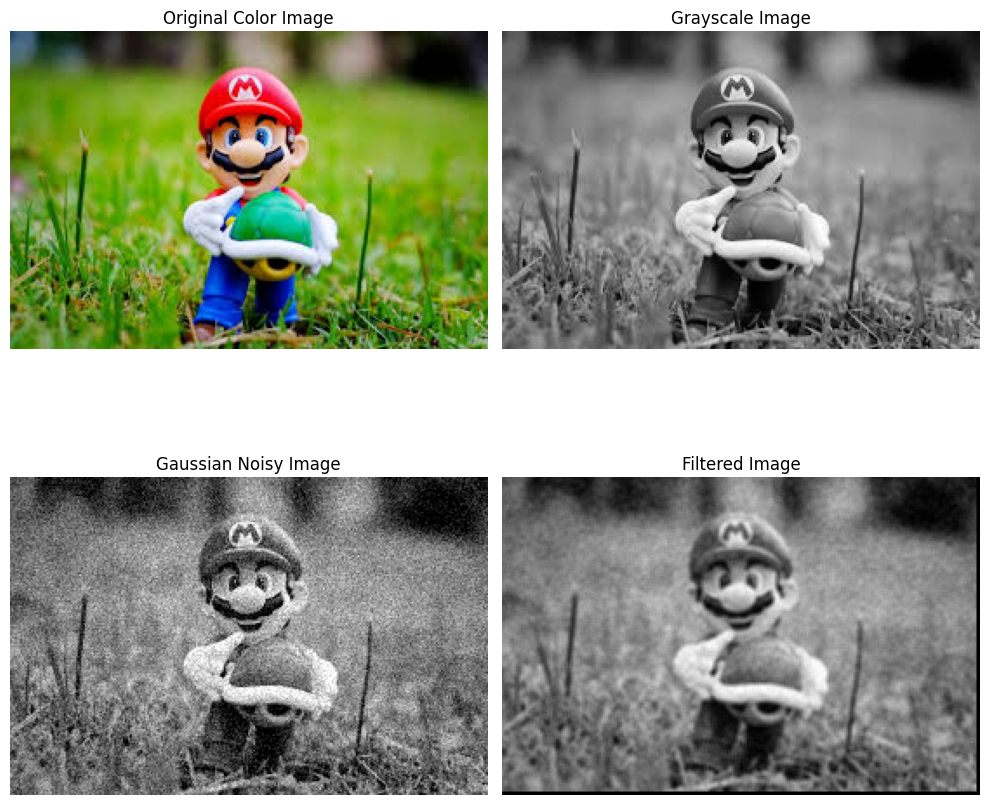

In [23]:
color_image = cv2.imread('mario.jpg', cv2.IMREAD_COLOR)
grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)
gaussian_noisy_image = add_gaussian_noise(grayscale_image)
averaging_filtered_image = averaging_filter(gaussian_noisy_image)

color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

# Original Color Image
plt.subplot(2, 2, 1)
plt.title("Original Color Image")
plt.imshow(color_image_rgb)
plt.axis('off')

# Grayscale Image
plt.subplot(2, 2, 2)
plt.title("Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

# Grayscale Image with Gaussian Noise
plt.subplot(2, 2, 3)
plt.title("Gaussian Noisy Image")
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.axis('off')

# Averaging Filtered Image
plt.subplot(2, 2, 4)
plt.title("Filtered Image")
plt.imshow(averaging_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Adding Salt and Pepper Noise**

In [26]:
def add_salt_pepper_noise(image):
    row, column = image.shape
    number_of_pixels = random.randint(300, 8000)

    # Add white pixels
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord, x_coord] = 255

    # Add black pixels
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord, x_coord] = 0

    return image

# **Removing the noise using Median Filtering**

In [27]:
def median_filter(image):
    row, column = image.shape
    mh, mw = 3, 3  # Mask size is 3x3
    new_image = np.zeros((row, column))

    # Apply the median filter
    for i in range(row - mh + 1):
        for j in range(column - mw + 1):
            rows = range(i, i + mh)
            cols = range(j, j + mw)
            part = np.sort(np.ravel(image[np.ix_(rows, cols)]))
            new_image[i, j] = part[len(part) // 2]  # Median is the middle value

    return new_image

# **Displaying the results**

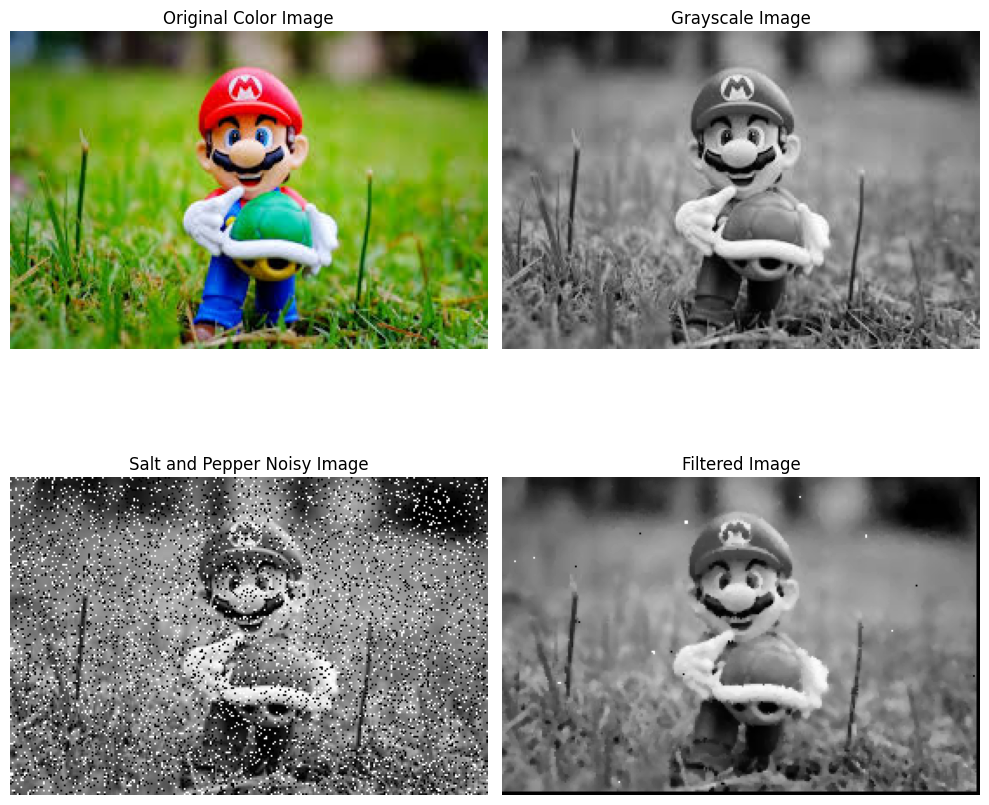

In [28]:
salt_pepper_noisy_image = add_salt_pepper_noise(grayscale_image.copy())
median_filtered_image = median_filter(salt_pepper_noisy_image)
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

# Original Color Image
plt.subplot(2, 2, 1)
plt.title("Original Color Image")
plt.imshow(color_image_rgb)
plt.axis('off')

# Grayscale Image
plt.subplot(2, 2, 2)
plt.title("Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

# Grayscale Image with Gaussian Noise
plt.subplot(2, 2, 3)
plt.title("Salt and Pepper Noisy Image")
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.axis('off')

# Median Filtered Image
plt.subplot(2, 2, 4)
plt.title("Filtered Image")
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

# **Observations**

### Gaussian Noise:
 - Adding Gaussian noise introduces random variations in pixel intensities, blurring the image.
 - Averaging filter effectively reduces Gaussian noise by smoothing the image and averaging out the variations.

### Salt and Pepper Noise:
 - Salt and pepper noise adds random black and white pixels to the image, creating sharp contrasts.
 - Median filter is more effective in removing salt and pepper noise because it replaces the noisy pixel with the median value of its neighbors, preserving edges and details better than averaging.
---
# **Applications**

 - Image processing: Noise reduction is crucial in various image processing tasks like image enhancement, object detection, and medical imaging.
 - Computer vision: Noise reduction improves the accuracy of algorithms that rely on image features.
 - Signal processing:  Similar filtering techniques are used in signal processing to remove noise from audio and video signals.
 - Medical imaging: Noise reduction is essential for improving the quality of medical images like X-rays and MRI scans.


---



# **Conclusion**

 - Averaging filters are good for smoothing images and reducing Gaussian noise.
 - Median filters are more robust to outliers and better at preserving edges when dealing with salt and pepper noise.
